In [1]:
import sys
from pathlib import Path

# Add src to path
sys.path.insert(0, str(Path.cwd().parent / 'src'))

import torch
import matplotlib.pyplot as plt
from graphssl.utils.plotting_utils import (
    plot_training_curves,
    plot_downstream_results,
    plot_downstream_distribution,
    plot_all_results,
    print_results_summary,
    plot_confusion_matrix
)

%matplotlib inline

In [3]:
# Define path to results directory
results_base = Path.cwd().parent / 'results'

# List available result directories
print("Available results directories:")
for i, path in enumerate(sorted(results_base.glob('exp_*')), 1):
    print(f"{i}. {path.name}")

# Select one (modify this to your experiment)
# Example: use the first SSL node experiment
results_path = results_base / 'quick_test1'
print(f"\nSelected: {results_path.name}")

Available results directories:

Selected: quick_test1


## 2. Print Results Summary

Get a quick text summary of all results.

In [6]:
print_results_summary(results_path)

Results Summary: quick_test1


## 3. Plot Training Curves

Visualize the training and validation metrics over epochs.

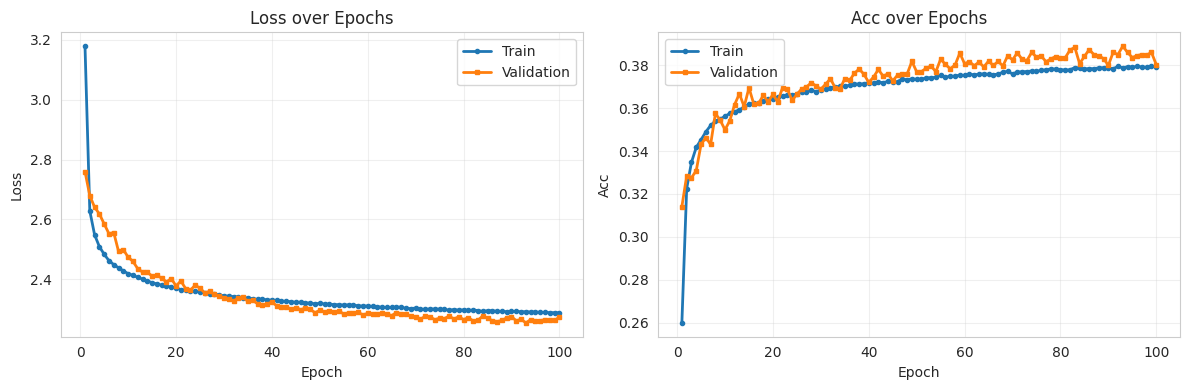

In [4]:
# Plot all available training metrics
fig = plot_training_curves(results_path)

## 4. Plot Downstream Evaluation Results

Visualize downstream task performance with error bars.

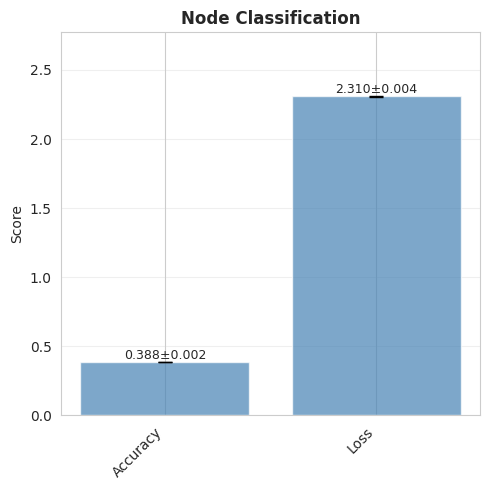

In [5]:
fig = plot_downstream_results(results_path)

## 5. Plot Distribution of Test Results

Show the distribution of test metrics across multiple runs (if available).

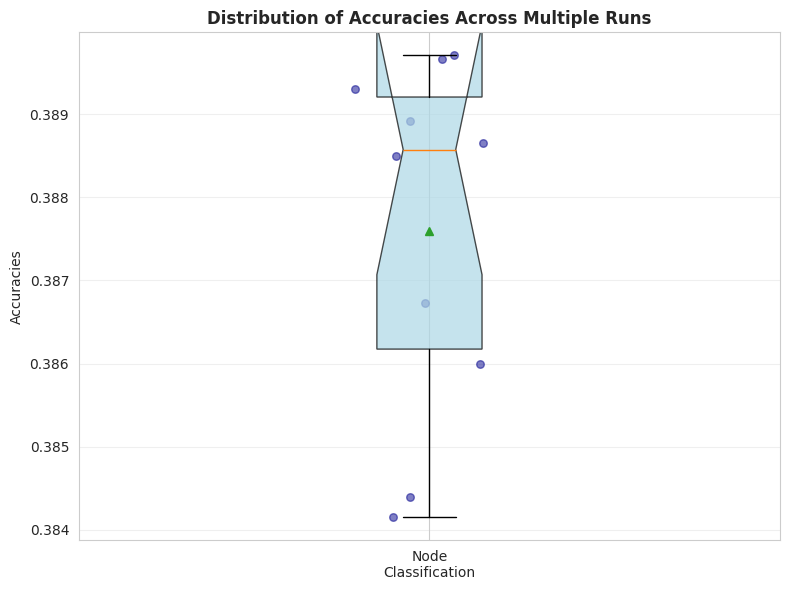

In [6]:
# Plot distribution of test accuracies
fig = plot_downstream_distribution(results_path, metric='test_accuracies')

## 6. Generate All Plots at Once

Create all available plots and optionally save them.


Generated 4 figures:
  - training_curves
  - downstream_results
  - downstream_dist_test_accuracies
  - downstream_dist_test_losses


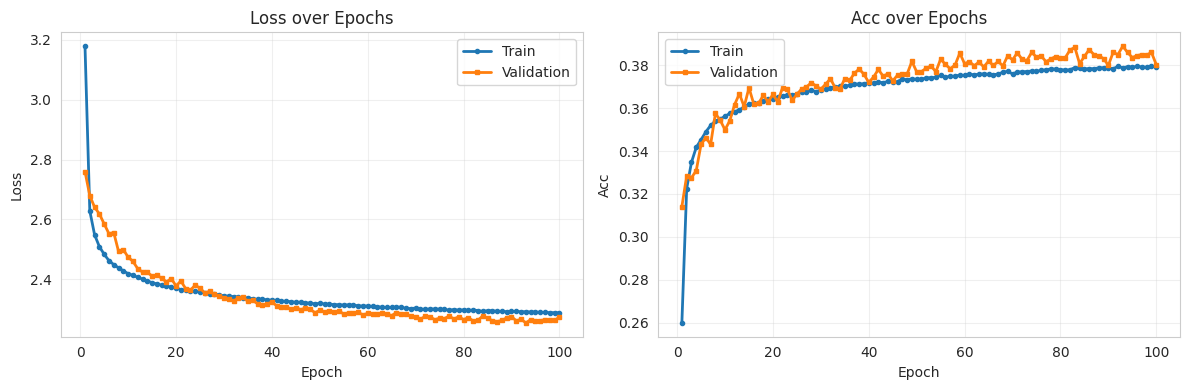

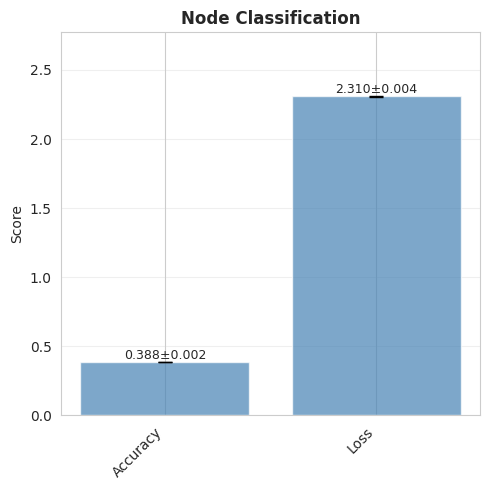

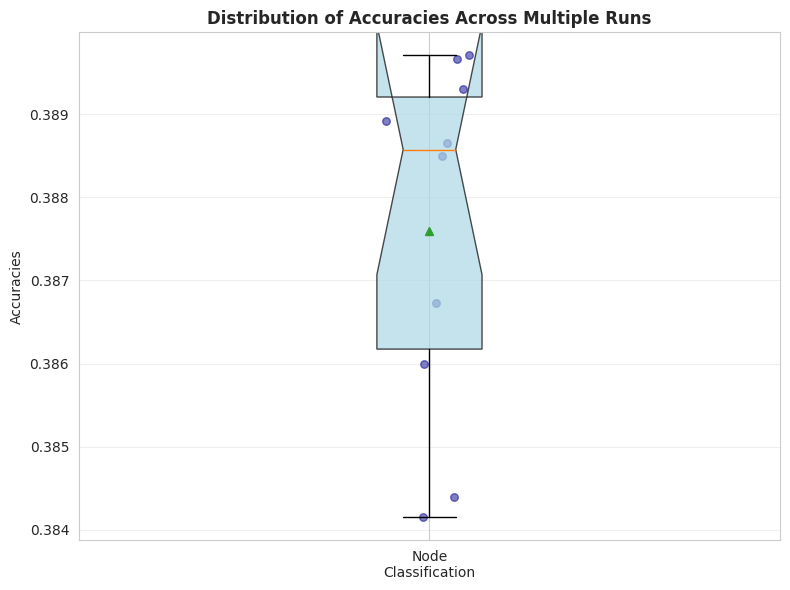

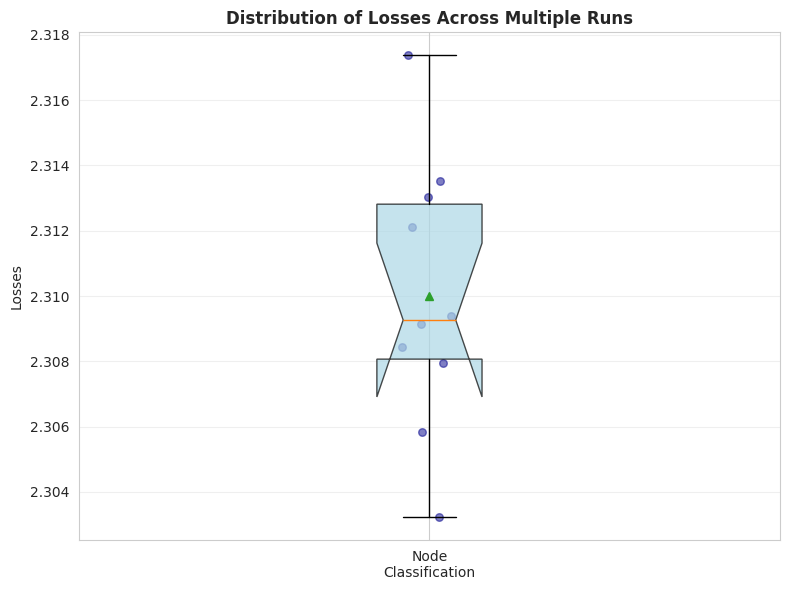

In [7]:
# Generate all plots (set show=False to avoid displaying all at once)
# Optionally save to a directory
save_dir = results_path / 'plots'
figures = plot_all_results(results_path, save_dir=save_dir, show=False)

print(f"\nGenerated {len(figures)} figures:")
for name in figures.keys():
    print(f"  - {name}")

## 7. Compare Multiple Experiments

Compare results across different experiment runs.

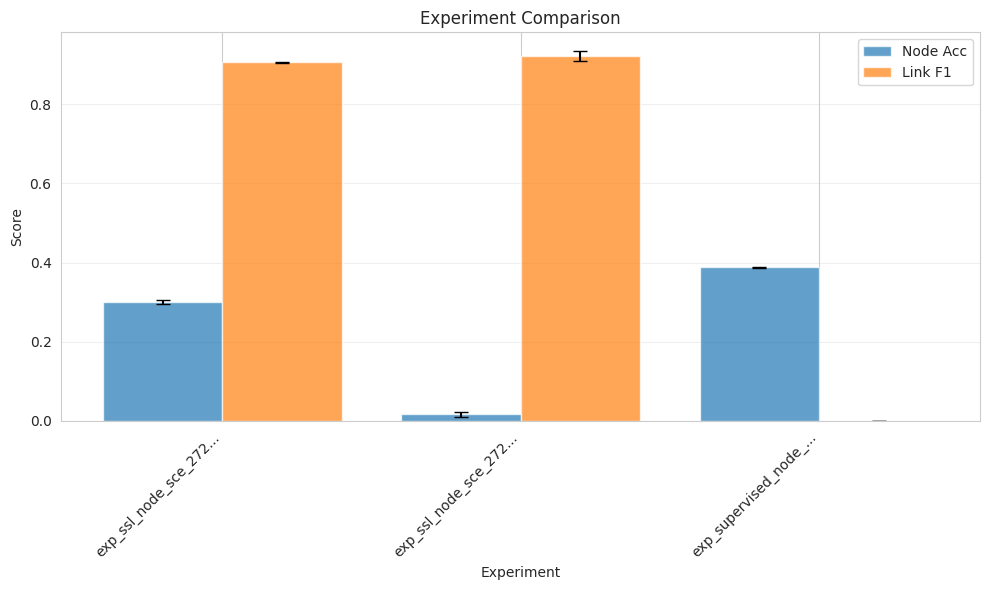

In [ ]:
from graphssl.utils.plotting_utils import load_results

# Compare multiple experiments
experiment_paths = [
    results_base / 'exp_ssl_node_sce_27209655_20251129_010045',
    results_base / 'exp_ssl_node_sce_27209658_20251129_025045',
    # Add more experiment paths here
]

comparison_data = []
for exp_path in experiment_paths:
    if exp_path.exists():
        results = load_results(exp_path)
        exp_name = exp_path.name[:20] + '...'  # Shorten name
        
        # Extract key metrics
        metrics = {'name': exp_name}
        if 'downstream_node' in results:
            metrics['node_acc'] = results['downstream_node'].get('test_acc_mean', 0)
            metrics['node_acc_std'] = results['downstream_node'].get('test_acc_std', 0)
        if 'downstream_link_multiclass' in results:
            metrics['link_acc'] = results['downstream_link_multiclass'].get('test_acc_mean', 0)
            metrics['link_acc_std'] = results['downstream_link_multiclass'].get('test_acc_std', 0)
            metrics['link_f1'] = results['downstream_link_multiclass'].get('test_f1_mean', 0)
            metrics['link_f1_std'] = results['downstream_link_multiclass'].get('test_f1_std', 0)
        
        comparison_data.append(metrics)

# Plot comparison
if comparison_data:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    names = [d['name'] for d in comparison_data]
    x = range(len(names))
    width = 0.25  # Width of bars
    
    if 'node_acc' in comparison_data[0]:
        node_accs = [d.get('node_acc', 0) for d in comparison_data]
        node_stds = [d.get('node_acc_std', 0) for d in comparison_data]
        ax.bar([i - width for i in x], node_accs, width, yerr=node_stds, 
               label='Node Acc', alpha=0.7, capsize=5)
    
    if 'link_acc' in comparison_data[0]:
        link_accs = [d.get('link_acc', 0) for d in comparison_data]
        link_stds = [d.get('link_acc_std', 0) for d in comparison_data]
        ax.bar(x, link_accs, width, yerr=link_stds,
               label='Link Acc', alpha=0.7, capsize=5)
    
    if 'link_f1' in comparison_data[0]:
        link_f1s = [d.get('link_f1', 0) for d in comparison_data]
        link_stds = [d.get('link_f1_std', 0) for d in comparison_data]
        ax.bar([i + width for i in x], link_f1s, width, yerr=link_stds,
               label='Link F1', alpha=0.7, capsize=5)
    
    ax.set_xlabel('Experiment')
    ax.set_ylabel('Score')
    ax.set_title('Experiment Comparison: Node and Link Prediction Performance')
    ax.set_xticks(x)
    ax.set_xticklabels(names, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No valid experiments found for comparison")

## 8. Confusion Matrix for Link Prediction

Visualize the confusion matrix for link prediction multiclass classification tasks.

In [ ]:
# Plot confusion matrix for a specific experiment with link multiclass results
# Change this to the experiment you want to visualize
exp_with_link = results_base / 'exp_ssl_node_sce_27209655_20251129_010045'

if exp_with_link.exists():
    results = load_results(exp_with_link)
    if 'downstream_link_multiclass' in results:
        print(f"Confusion Matrix for: {exp_with_link.name}\n")
        fig = plot_confusion_matrix(exp_with_link, normalize=True)
    else:
        print(f"No link multiclass results found in {exp_with_link.name}")
else:
    print(f"Experiment path not found: {exp_with_link.name}")